In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from jarowinkler import jarowinkler_similarity
import pandas as pd

In [2]:
img = mpimg.imread('prescription_1.jpeg')
imgplot = plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'prescription_1.jpeg'

In [ ]:
def detect_document(path):
    """Detects document features in an image."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)
    
    response = client.document_text_detection(image=image)
    paragraphs_confidence=[]
    words_dict={}
    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            print('\nBlock confidence: {}\n'.format(block.confidence))

            for paragraph in block.paragraphs:
                print('Paragraph confidence: {}'.format(
                    paragraph.confidence))
                paragraphs_confidence.append(paragraph.confidence)

                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    print('Word text: {} (confidence: {})'.format(
                        word_text, word.confidence))
                    words_dict[word_text]=word.confidence
                    for symbol in word.symbols:
                        print('\tSymbol: {} (confidence: {})'.format(
                            symbol.text, symbol.confidence))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return paragraphs_confidence , words_dict
        

In [ ]:
predict=detect_document('prescription_1.jpeg')

In [ ]:
predict

In [14]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    # [START vision_python_migration_text_detection]
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
    
    image = vision.Image(content=content)

    response = client.text_detection(image=image ,image_context={"language_hints": ["ko"]})  # Bengali

    texts = response.text_annotations
    print('Texts:')
    
    words_dict={}
    words_list=[]
    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))
        
        words_dict[text.description]=list(vertices)
        words_list.append(text.description)
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return words_list

In [ ]:
predict_2 = detect_text('prescription_1.jpeg')


In [ ]:
del predict_2[0]
predict_2

In [ ]:
img = mpimg.imread('prescription_2.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
detect_text("prescription_2.jpeg")

In [ ]:
img = mpimg.imread('prescription_3.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img = mpimg.imread('prescription_3.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
predict_4= detect_text("prescription_4.jpg")

In [ ]:
predict_4[1]

In [ ]:
img = mpimg.imread('prescription_5.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
predict_5 =detect_text("prescription_5.jpg")

In [ ]:
predict_5

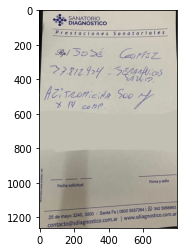

In [3]:
img = mpimg.imread('../imgs/receta_1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [15]:
predict_6 =detect_text("../imgs/receta_1.jpg")

Texts:

"SANATORIO
DIAGNOSTICO
Prestaciones Sanatoriales
Rp/ JOSE
GOMEZ
27.812.934-3Enfricos
SA 2012.
AZITROMICINA SOO M
X 14 COMP.
Firma y sello
Fecha solicitud
25 de mayo 3240, 3000 - Santa Fe | 0800 5557264 | 342 5956663
| www.sdiagnostico.com.ar
contacto@sdiagnostico.com.ar
RECETARIO CONS EXTERNO-002"
bounds: (1,29),(800,29),(800,1262),(1,1262)

"SANATORIO"
bounds: (170,35),(351,37),(351,59),(170,57)

"DIAGNOSTICO"
bounds: (171,62),(391,65),(391,88),(171,85)

"Prestaciones"
bounds: (96,119),(400,119),(400,146),(96,146)

"Sanatoriales"
bounds: (429,119),(728,119),(728,146),(429,146)

"Rp"
bounds: (97,224),(160,224),(160,269),(97,269)

"/"
bounds: (156,224),(180,224),(180,269),(156,269)

"JOSE"
bounds: (194,224),(369,224),(369,269),(194,269)

"GOMEZ"
bounds: (463,218),(703,225),(701,279),(461,272)

"27.812.934-3Enfricos"
bounds: (68,319),(711,327),(710,388),(67,380)

"SA"
bounds: (496,369),(552,374),(548,410),(493,405)

"2012"
bounds: (558,374),(657,383),(653,419),(555,410)

"."
boun

In [10]:
def detect_numbers(image_file):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()
    print("before type")

    response = client.text_detection(image=image_file ,image_context={"language_hints": ["ko"]})  

    texts = response.text_annotations
    print('Texts:')

    number_list=[]
    for text in texts:
        print('\n"{}"'.format(text.description))

        number_list.append(text.description)
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

    del number_list[0]
    return number_list

In [11]:
predict_6_numbers =detect_numbers("../imgs/receta_1.jpg")

before type


TypeError: get() expected a dict or protobuf message, got <class 'str'>.

In [ ]:
def get_prob_value(target,columna,thr):
    sims =[]
    method= jarowinkler_similarity
    vocab= list(set(med[columna]))
    for word in vocab:
        sims.append(method(target, word))
    if np.max(sims) > thr:
        return vocab[np.argmax(sims)]
    else:
        return "error"

In [ ]:
def prediccion_pariente(target):

    final_list = []
    for w in target:
        droga_pred= get_prob_value(w.lower() ,'Principio activo',0.9)
        gramaje_pred= get_prob_value(w.lower(),'Potencia',0.9)
        unidad_pred= get_prob_value(w.lower(),'Unidad de potencia',0.8)

        if droga_pred != "error":    
            final_list.append(droga_pred)
        if gramaje_pred != "error":    
            final_list.append(gramaje_pred)
        if unidad_pred != "error":    
            final_list.append(unidad_pred)

    return final_list

In [ ]:
prediccion_pariente(predict_6)

In [ ]:
med = pd.read_csv("notebooks/medicamentos.csv", sep=';', encoding='latin-1')
med.head()

In [ ]:
list(set(med['Principio activo']))

In [ ]:
def get_prob_value(target,columna,thr):
    sims =[]
    method= jarowinkler_similarity
    vocab= list(set(med[columna]))
    for word in vocab:
        sims.append(method(target, word))
    if np.max(sims) > thr:
        return vocab[np.argmax(sims)]
    else:
        return "error"

In [ ]:
def prediccion_pariente(target):

    final_list = []
    for w in target:
        droga_pred= get_prob_value(w ,'Principio activo',0.9)
        gramaje_pred= get_prob_value(w,'Potencia',0.9)
        unidad_pred= get_prob_value(w,'Unidad de potencia',0.8)

        if droga_pred != "error":    
            final_list.append(droga_pred)
        if gramaje_pred != "error":    
            final_list.append(gramaje_pred)
        if unidad_pred != "error":    
            final_list.append(unidad_pred)

    return final_list

In [ ]:
prediccion_pariente(['Jaracetamol','500','mg'])

In [ ]:
print('hola')